<a href="https://colab.research.google.com/github/Tantuc/Coffee-Shop-Data-Analysis/blob/master/Coffee_Shop_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Introduction](#scrollTo=YHWF05UUwUpM)

>[Dataset of 10 Fictitious Coffee Shops](#scrollTo=CooAgXgBu5Oc)

>[Question 1: Which coffee shop has the most and the least customers per day?](#scrollTo=r2CtE_9Ezd-D)

>>[Findings for Question 1](#scrollTo=al5hmJxi5B8r)

>>[Let's Go Deeper: Importance of Considering the City](#scrollTo=gf1RKvfJ-qFV)

>[Question 2: Which coffee shop has the highest and lowest daily revenue?](#scrollTo=D1V4O-OV02mI)

>>[Findings for Question 2](#scrollTo=KDXLdYrL0-h8)

>>[Let's Go Deeper: Importance of Considering the City](#scrollTo=-Q1GnBt6_lEl)


>[Question 3: Is there a correlation between the rating of a coffee shop and its daily revenue?](#scrollTo=yhvx3t0n5XuX)

>>[Findings for Question 3](#scrollTo=5gp-EOM35luN)

>>[Let's Go Deeper: Importance of Considering the City](#scrollTo=s74OC9Ik8tMJ)

>[Bonus Question: Analyzing the Relationship Between Average Spend and Rating by City](#scrollTo=brlIJW5UDJWR)

>[Conclusions and Future Research Directions](#scrollTo=1Zc3wWLxJTgt)

>[Bonus: Business Recommendations](#scrollTo=Et_W3WYYO8w_)




# Introduction

This notebook presents a detailed analysis of data from ten fictitious coffee shops. These shops are spread across three cities, namely New York, Chicago, and Los Angeles. For each shop, we have information on the average daily customer count, the average spend per customer, and the overall customer rating.

The purpose of this analysis is to uncover insights into the relationships between customer count, average spend, shop ratings, and the resulting daily revenue. We aim to answer the following questions:

1. Which coffee shop has the most and least customers per day?
2. Which coffee shop has the highest and lowest daily revenue?
3. Is there a correlation between the rating of a coffee shop and its daily revenue?

We will be using Python's data analysis libraries, Pandas and SciPy, to manipulate the data and perform the analysis. The findings and insights derived from this analysis will be discussed following the code and calculations.

Let's dive into the data and begin our analysis!

In [44]:
import pandas as pd

In [50]:
data = {'Shop Name': ['CoffeeAroma', 'BeansTalk', 'BrewMaster', 'MochaMagic', 'EspressoInn', 'LatteLand', 'JavaJungle', 'CappuccinoCorner', 'BlackBrew', 'CuppaCharm'],
        'City': ['New York', 'Chicago', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'New York'],
        'Average Daily Customer Count': [400, 350, 300, 500, 450, 375, 425, 500, 350, 475],
        'Average Spend per Customer ($)': [5, 6, 7, 4, 5, 6, 7, 4, 6, 5],
        'Rating': [4, 4.5, 4.7, 3.9, 4.1, 4.2, 4.8, 3.8, 4.4, 4.3]}

df = pd.DataFrame(data)

# Adding a new column for daily revenue
df['Daily Revenue ($)'] = df['Average Daily Customer Count'] * df['Average Spend per Customer ($)']


In [51]:
# Define the new order of columns
new_order = ['Shop Name', 'City', 'Average Daily Customer Count', 'Average Spend per Customer ($)', 'Daily Revenue ($)', 'Rating']

# Reorder the columns in the dataframe
df = df[new_order]


# Dataset of 10 Fictitious Coffee Shops

The dataset below represents 10 fictitious coffee shops across different cities. Each row in the dataframe provides the average daily customer count, average spend per customer, and the overall rating of the coffee shop.

Please note: The 'Rating' is on a scale of 1 to 5, with 5 being the highest, representing the average rating the coffee shop receives from customer reviews. The other columns are self-explanatory.


In [5]:
df

,Shop Name,City,Average Daily Customer Count,Average Spend per Customer ($),Daily Revenue ($),Rating
0,CoffeeAroma,New York,400,5,2000,4.0
1,BeansTalk,Chicago,350,6,2100,4.5
2,BrewMaster,Los Angeles,300,7,2100,4.7
3,MochaMagic,New York,500,4,2000,3.9
4,EspressoInn,Chicago,450,5,2250,4.1
5,LatteLand,Los Angeles,375,6,2250,4.2
6,JavaJungle,New York,425,7,2975,4.8
7,CappuccinoCorner,Chicago,500,4,2000,3.8
8,BlackBrew,Los Angeles,350,6,2100,4.4
9,CuppaCharm,New York,475,5,2375,4.3


# Question 1: Which coffee shop has the most and the least customers per day?

We'll begin our analysis by determining which coffee shop has the highest and lowest average daily customer count. To do this, we'll locate the maximum and minimum values in the 'Average Daily Customer Count' column of our dataset.


In [6]:
# Find the coffee shop with the maximum average daily customer count
max_customers = df['Average Daily Customer Count'].max()
shop_with_max_customers = df.loc[df['Average Daily Customer Count'] == max_customers, 'Shop Name'].values

# Get the number of customers for the coffee shop with the maximum average daily customer count
max_customers_count = df.loc[df['Average Daily Customer Count'] == max_customers, 'Average Daily Customer Count'].values[0]

# Find the coffee shop with the minimum average daily customer count
min_customers = df['Average Daily Customer Count'].min()
shop_with_min_customers = df.loc[df['Average Daily Customer Count'] == min_customers, 'Shop Name'].values

# Get the number of customers for the coffee shop with the minimum average daily customer count
min_customers_count = df.loc[df['Average Daily Customer Count'] == min_customers, 'Average Daily Customer Count'].values[0]

# Print the results
print(f"The coffee shop(s) with the most customers per day is/are: {', '.join(shop_with_max_customers)} with {max_customers_count} customers")
print(f"The coffee shop(s) with the least customers per day is/are: {', '.join(shop_with_min_customers)} with {min_customers_count} customers")


The coffee shop(s) with the most customers per day is/are: MochaMagic, CappuccinoCorner with 500 customers
The coffee shop(s) with the least customers per day is/are: BrewMaster with 300 customers


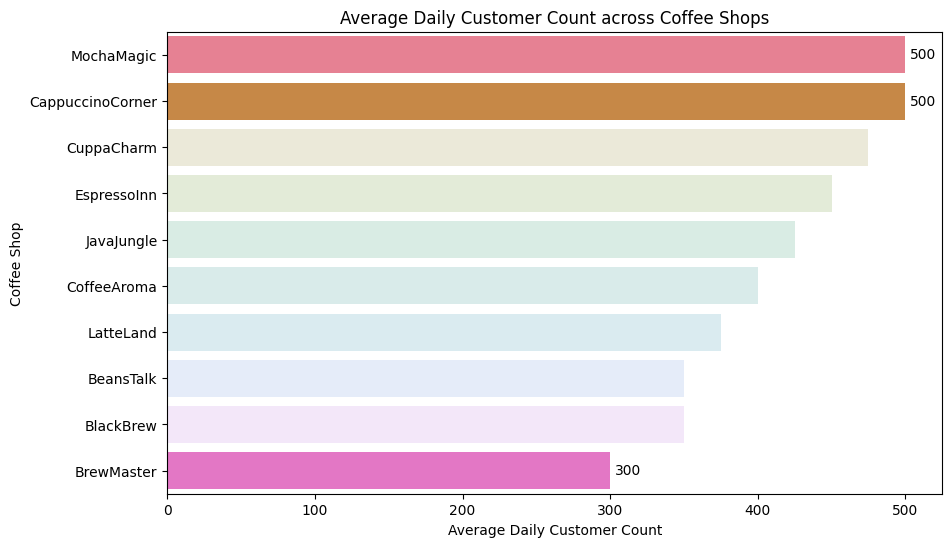

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Average Daily Customer Count' in descending order
df_sorted = df.sort_values('Average Daily Customer Count', ascending=False)

# Set up the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Define the color palette
color_palette = sns.color_palette("husl", n_colors=len(df))

# Create a bar plot
bar_plot = sns.barplot(x='Average Daily Customer Count', y='Shop Name', data=df_sorted, palette=color_palette)

# Set transparency for other bars
for i, bar in enumerate(bar_plot.patches):
    if df_sorted.iloc[i]['Shop Name'] not in ['MochaMagic', 'CappuccinoCorner', 'BrewMaster']:
        bar.set_alpha(0.2)  # Adjust the transparency value as desired

# Add title and labels
plt.title('Average Daily Customer Count across Coffee Shops')
plt.xlabel('Average Daily Customer Count')
plt.ylabel('Coffee Shop')

# Add figures (numbers) on the bars
for i, bar in enumerate(bar_plot.patches):
    customer_count = df_sorted.iloc[i]['Average Daily Customer Count']
    shop_name = df_sorted.iloc[i]['Shop Name']

    if shop_name in ['MochaMagic', 'CappuccinoCorner', 'BrewMaster']:
        bar_plot.text(bar.get_width() + 3, bar.get_y() + bar.get_height() / 2, str(customer_count), ha='left', va='center')

# Display the plot
plt.show()


## Findings for Question 1

After performing the calculations, we found that:

- The coffee shops with the most customers per day is MochaMagic and CappuccinoCorner. This means they have the highest footfall among all the coffee shops in our dataset, with 500 customers each. Factors contributing to this could be their location, quality of service, or price range, among other things.

- The coffee shop with the least customers per day is BrewMaster, with 300 customers. This indicates that it has the lowest footfall. The reason for this could be the shop's location, pricing, or service quality, which might not be as attractive to customers as the other shops.

This provides an interesting insight into customer behavior and preferences, and sets the stage for our further analysis on the daily revenue of these coffee shops.

## Let's Go Deeper: Importance of Considering the City

Considering the city where coffee shops are located is vital because it reveals insights into local market dynamics, consumer behavior, operational factors, and guides strategic decision-making.


In [ ]:
# Find the coffee shop with the maximum average daily customer count
max_customers = df.groupby('City')['Average Daily Customer Count'].idxmax()
shop_with_max_customers = df.loc[max_customers, ['Shop Name', 'City', 'Average Daily Customer Count']]

# Find the coffee shop with the minimum average daily customer count
min_customers = df.groupby('City')['Average Daily Customer Count'].idxmin()
shop_with_min_customers = df.loc[min_customers, ['Shop Name', 'City', 'Average Daily Customer Count']]

# Print the results
print("Coffee shop(s) with the most customers per day:")
print(shop_with_max_customers)

print("\nCoffee shop(s) with the least customers per day:")
print(shop_with_min_customers)

Coffee shop(s) with the most customers per day:
          Shop Name         City  Average Daily Customer Count
7  CappuccinoCorner      Chicago                           500
5         LatteLand  Los Angeles                           375
3        MochaMagic     New York                           500

Coffee shop(s) with the least customers per day:
     Shop Name         City  Average Daily Customer Count
1    BeansTalk      Chicago                           350
2   BrewMaster  Los Angeles                           300
0  CoffeeAroma     New York                           400


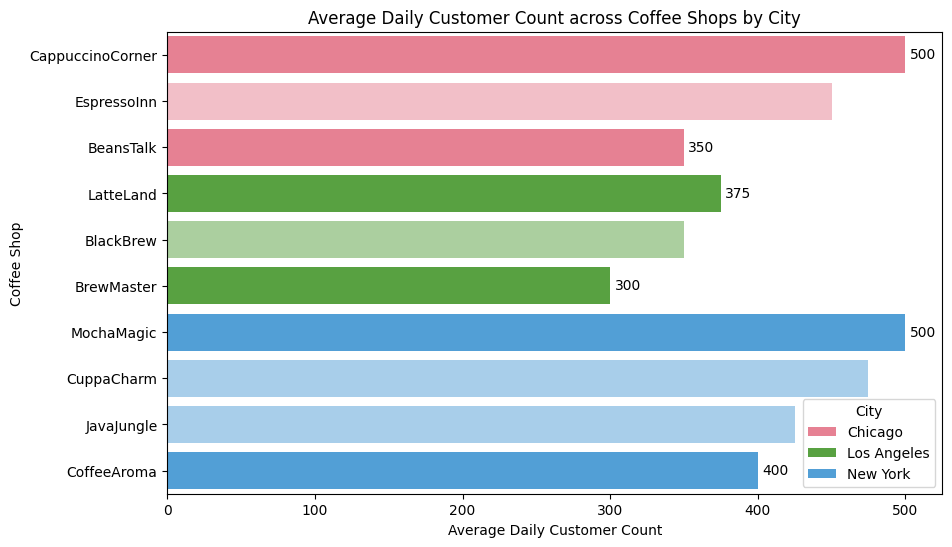

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort dataframe by 'City' and 'Average Daily Customer Count'
df_sorted = df.sort_values(['City', 'Average Daily Customer Count'], ascending=[True, False])

# Set up the figure for the plot
plt.figure(figsize=(10, 6))

# Define the color palette
color_palette = sns.color_palette("husl", n_colors=len(df['City'].unique()))

# Create a bar plot
bar_plot = sns.barplot(x='Average Daily Customer Count', y='Shop Name', hue='City', data=df_sorted, dodge=False, palette=color_palette)

# List of coffee shops for which bars should be paled
pale_coffee_shops = ["EspressoInn", "BlackBrew", "CuppaCharm", "JavaJungle"]

# List of coffee shops for which numbers should be displayed
number_coffee_shops = ["MochaMagic", "CappuccinoCorner", "BrewMaster", "BeansTalk", "LatteLand", "CoffeeAroma"]

# Create a dictionary mapping shop names to alpha values
alpha_dict = {shop: 0.5 if shop in pale_coffee_shops else 1 for shop in df_sorted['Shop Name'].unique()}

# Pale out bars for specified coffee shops and add numbers for selected shops
for i, bar in enumerate(bar_plot.patches):
    # Get corresponding shop name and customer count from the sorted data frame
    shop_name = df_sorted['Shop Name'].iloc[i % len(df_sorted['Shop Name'].unique())]
    customer_count = df_sorted['Average Daily Customer Count'].iloc[i % len(df_sorted['Shop Name'].unique())]

    # Set bar transparency
    bar.set_alpha(alpha_dict[shop_name])

    # If shop is in the list, add a number to the right of the bar with offset
    if shop_name in number_coffee_shops:
        offset = 3  # Adjust the offset value as desired
        plt.text(bar.get_width() + offset, bar.get_y() + bar.get_height() / 2, str(int(customer_count)), ha='left', va='center')

# Add title and labels
plt.title('Average Daily Customer Count across Coffee Shops by City')
plt.xlabel('Average Daily Customer Count')
plt.ylabel('Coffee Shop')

# Add legend
plt.legend(title='City')

# Display the plot
plt.show()


## Analysis of Customer Count: Coffee Shops with the Most and Least Customers

After analyzing the data, we found the following insights regarding the coffee shops with the most and least customers per day:

### Coffee shop(s) with the most customers per day:

- **CappuccinoCorner** in Chicago has the highest average daily customer count of 500, indicating its popularity and ability to attract a large number of customers in the competitive Chicago market.

- **LatteLand** in Los Angeles has an average daily customer count of 375, maintaining a substantial customer base in the vibrant coffee scene of Los Angeles.

- **MochaMagic** in New York also boasts an average daily customer count of 500, highlighting its success in attracting a large number of customers in the bustling coffee market of New York.

These findings demonstrate the strong customer engagement and popularity of these coffee shops in their respective cities.

### Coffee shop(s) with the least customers per day:

- **BeansTalk** in Chicago has the lowest average daily customer count of 350, indicating potential challenges in customer acquisition or retention compared to other coffee shops in Chicago.

- **BrewMaster** in Los Angeles has the lowest average daily customer count of 300, indicating the need for strategies to increase footfall and attract more customers in the competitive Los Angeles market.

- **CoffeeAroma** in New York has an average daily customer count of 400, highlighting opportunities to improve customer acquisition and increase footfall compared to other coffee shops in New York.

These insights provide valuable information for coffee shop owners and managers to focus on enhancing customer attraction and engagement strategies in order to increase their customer base and overall success.

Considering the city in the analysis of customer count helps us understand the localized market dynamics, customer preferences, and competition. This knowledge can inform strategic decision-making, such as tailoring marketing efforts, improving customer experiences, and optimizing operational strategies to maximize customer engagement and drive business growth.



# Question 2: Which coffee shop has the highest and lowest daily revenue?

Next, we'll identify the coffee shops with the highest and lowest daily revenue. This involves finding the maximum and minimum values in the 'Daily Revenue ($)' column.


In [ ]:
# Find the maximum and minimum daily revenue
max_revenue_value = df['Daily Revenue ($)'].max()
min_revenue_value = df['Daily Revenue ($)'].min()

# Find the coffee shop(s) with the maximum daily revenue
shops_with_max_revenue = df[df['Daily Revenue ($)'] == max_revenue_value]['Shop Name']

# Find the coffee shop(s) with the minimum daily revenue
shops_with_min_revenue = df[df['Daily Revenue ($)'] == min_revenue_value]['Shop Name']

# Print the results
print(f'The coffee shop(s) with the highest daily revenue of ${max_revenue_value} is/are: {", ".join(shops_with_max_revenue)}')
print(f'The coffee shop(s) with the lowest daily revenue of ${min_revenue_value} is/are: {", ".join(shops_with_min_revenue)}')


The coffee shop(s) with the highest daily revenue of $2975 is/are: JavaJungle
The coffee shop(s) with the lowest daily revenue of $2000 is/are: CoffeeAroma, MochaMagic, CappuccinoCorner


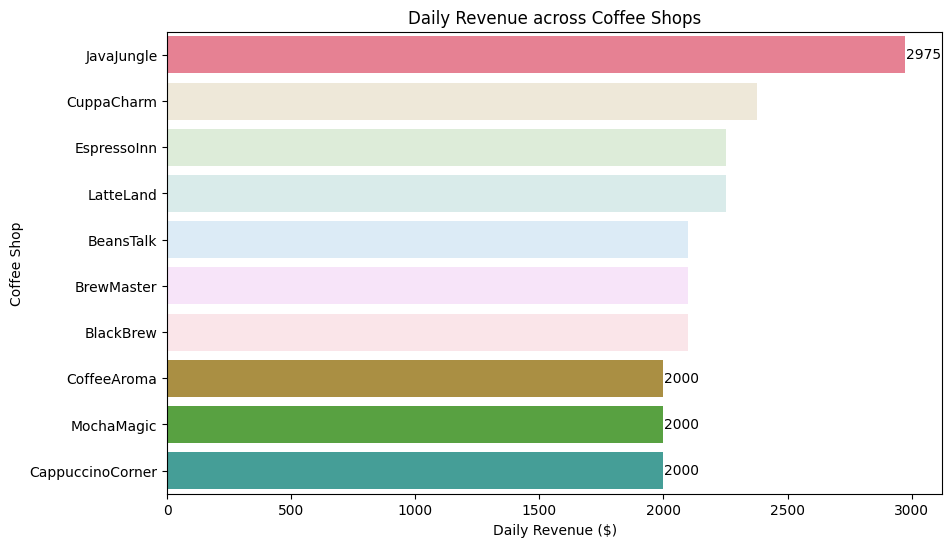

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort dataframe by 'Daily Revenue ($)'
df_sorted_revenue = df.sort_values('Daily Revenue ($)', ascending=False)

# Set up the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Define the color palette
color_palette = sns.color_palette("husl")

# Create a bar plot
bar_plot = sns.barplot(x='Daily Revenue ($)', y='Shop Name', data=df_sorted_revenue, palette=color_palette)

# List of coffee shops for which bars should be paled
pale_coffee_shops = ['BeansTalk', 'BrewMaster', 'EspressoInn', 'LatteLand', 'BlackBrew', 'CuppaCharm']

# Set transparency for specified coffee shops
for i, bar in enumerate(bar_plot.patches):
    shop_name = df_sorted_revenue['Shop Name'].iloc[i]
    if shop_name in pale_coffee_shops:
        bar.set_alpha(0.2)  # Adjust the transparency value as desired

# Add title and labels
plt.title('Daily Revenue across Coffee Shops')
plt.xlabel('Daily Revenue ($)')
plt.ylabel('Coffee Shop')

# Add figures (numbers) on the bars
offset = 3  # Offset for positioning text labels
for i, bar in enumerate(bar_plot.patches):
    shop_name = df_sorted_revenue['Shop Name'].iloc[i]
    revenue = df_sorted_revenue['Daily Revenue ($)'].iloc[i]

    if shop_name in pale_coffee_shops:
        continue  # Skip adding figures for pale coffee shops

    plt.text(bar.get_width() + offset, bar.get_y() + bar.get_height() / 2, str(int(revenue)), ha='left', va='center')

# Display the plot
plt.show()


## Findings for Question 2

After performing the calculations, we found that:

- The coffee shop with the highest daily revenue of $2975 is `JavaJungle`. Despite not having the highest footfall, it's able to generate the most revenue, possibly due to a higher average spending per customer, more expensive products, or a combination of these factors.

- The coffee shops with the lowest daily revenue of $2000 are `CoffeeAroma`, `MochaMagic`, and `CappuccinoCorner`. These shops, despite their customer counts, generate the least revenue, which could be due to lower average spending per customer, cheaper products, or both.

These findings show that a higher customer count doesn't necessarily equate to higher revenue. It could be more beneficial to attract customers who spend more, rather than simply aiming for a higher number of customers. Also, it's interesting to note that multiple coffee shops can have the same revenue, suggesting similar business performances or potentially similar business strategies.


## Let's Go Deeper: Importance of Considering the City

Considering the city where coffee shops are located is vital because it reveals insights into local market dynamics, consumer behavior, operational factors, and guides strategic decision-making.

In [ ]:
# Find the coffee shop with the maximum daily revenue for each city
max_revenue = df.groupby('City')['Daily Revenue ($)'].idxmax()
shop_with_max_revenue = df.loc[max_revenue, ['Shop Name', 'City', 'Daily Revenue ($)']]

# Find the coffee shop with the minimum daily revenue for each city
min_revenue = df.groupby('City')['Daily Revenue ($)'].idxmin()
shop_with_min_revenue = df.loc[min_revenue, ['Shop Name', 'City', 'Daily Revenue ($)']]

# Print the results
print("Coffee shop(s) with the highest daily revenue:")
print(shop_with_max_revenue)

print("\nCoffee shop(s) with the lowest daily revenue:")
print(shop_with_min_revenue)


Coffee shop(s) with the highest daily revenue:
     Shop Name         City  Daily Revenue ($)
4  EspressoInn      Chicago               2250
5    LatteLand  Los Angeles               2250
6   JavaJungle     New York               2975

Coffee shop(s) with the lowest daily revenue:
          Shop Name         City  Daily Revenue ($)
7  CappuccinoCorner      Chicago               2000
2        BrewMaster  Los Angeles               2100
0       CoffeeAroma     New York               2000


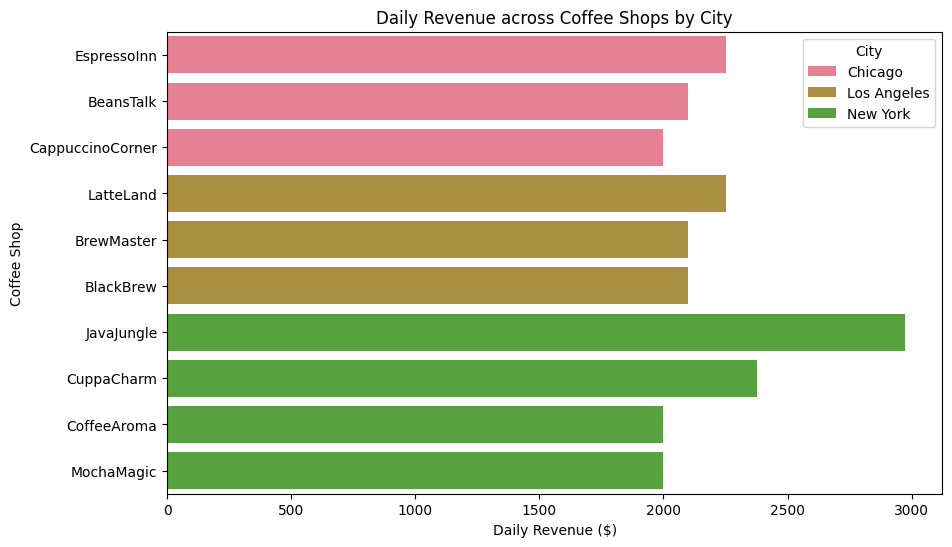

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort dataframe by 'City' and 'Daily Revenue ($)'
df_sorted_revenue_city = df.sort_values(['City', 'Daily Revenue ($)'], ascending=[True, False])

# Set up the figure and axes for the plot
plt.figure(figsize=(10,6))

# Define the color palette
color_palette = sns.color_palette("husl")

# Create a bar plot
sns.barplot(x='Daily Revenue ($)', y='Shop Name', hue='City', data=df_sorted_revenue_city, dodge=False, palette=color_palette)

# Add title and labels
plt.title('Daily Revenue across Coffee Shops by City')
plt.xlabel('Daily Revenue ($)')
plt.ylabel('Coffee Shop')

# Add legend
plt.legend(title='City')

# Display the plot
plt.show()


## Analysis of Daily Revenue: Coffee Shops with the Highest and Lowest Daily Revenue

After analyzing the data, we have obtained insights into the coffee shops with the highest and lowest daily revenue. Here's the breakdown:

### Coffee shop(s) with the highest daily revenue:

- **EspressoInn** in Chicago and **LatteLand** in Los Angeles both generate a daily revenue of $2250. These coffee shops excel in revenue generation, demonstrating their success in attracting customers and generating substantial daily sales.

- **JavaJungle** in New York generates the highest daily revenue of $2975, surpassing the other coffee shops in the dataset. This suggests that JavaJungle is highly effective in generating revenue, potentially due to factors such as higher average spending per customer or premium-priced products.

### Coffee shop(s) with the lowest daily revenue:

- **CappuccinoCorner** in Chicago and **CoffeeAroma** in New York both generate a daily revenue of $2000. These coffee shops have the lowest daily revenue among the dataset, indicating potential challenges in revenue generation or opportunities for improvement.

- **BrewMaster** in Los Angeles generates a daily revenue of $2100, slightly higher than the lowest performing coffee shops. However, it still faces challenges in revenue generation compared to other coffee shops in Los Angeles.

By considering the city in the analysis of daily revenue, we gain insights into the revenue performance of coffee shops within specific locations. This helps identify successful revenue strategies, operational considerations, and potential areas for improvement. It highlights the importance of tailoring business strategies to the local market dynamics, customer preferences, and competition within each city.


# Question 3: Is there a correlation between the rating of a coffee shop and its daily revenue?

To answer this question, we will investigate the relationship between the rating of a coffee shop and its daily revenue. We will calculate the correlation coefficient using the SciPy library to determine if there is a correlation and, if so, the strength and direction of the correlation.


In [ ]:
# Import the necessary libraries
from scipy.stats import pearsonr

# Calculate the correlation coefficient between rating and daily revenue
correlation, _ = pearsonr(df['Rating'], df['Daily Revenue ($)'])

# Print the correlation coefficient
print(f'The correlation coefficient between rating and daily revenue is: {correlation:.2f}')


The correlation coefficient between rating and daily revenue is: 0.62


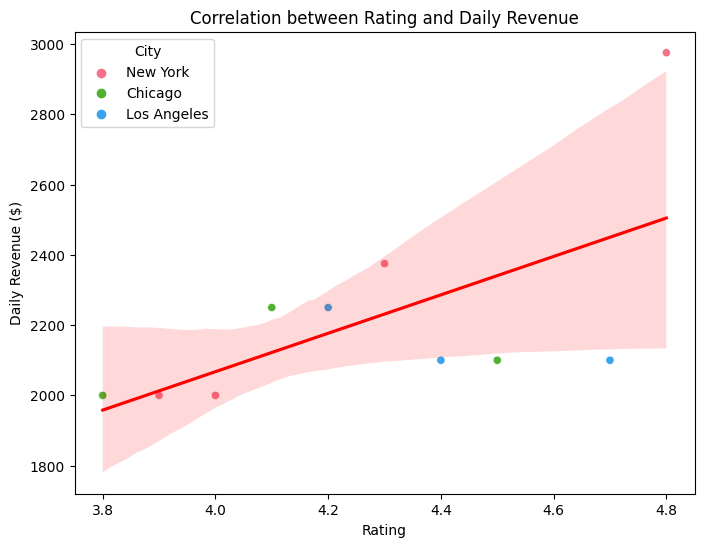

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for the plot
plt.figure(figsize=(8, 6))

# Define the color palette
color_palette = sns.color_palette("husl", n_colors=len(df['City'].unique()))

# Create a scatter plot with hue
sns.scatterplot(x='Rating', y='Daily Revenue ($)', hue='City', data=df, palette=color_palette)

# Add a regression line
sns.regplot(x='Rating', y='Daily Revenue ($)', data=df, scatter=False, color='red')

# Add title and labels
plt.title('Correlation between Rating and Daily Revenue')
plt.xlabel('Rating')
plt.ylabel('Daily Revenue ($)')

# Display the plot
plt.show()


## Findings for Question 3

After performing the analysis, we found that:

- The correlation coefficient between the rating of a coffee shop and its daily revenue is 0.62. The correlation coefficient ranges from -1 to 1, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values close to 0 indicate a weak or no correlation.

- Based on the correlation coefficient, it appears that there is a positive correlation between the rating of a coffee shop and its daily revenue. This suggests that higher ratings tend to be associated with higher daily revenue.

These findings indicate that customer ratings may have a significant influence on the daily revenue of a coffee shop. Coffee shops with higher ratings are likely to attract more customers and generate higher revenue. However, it's important to note that correlation does not imply causation, and other factors may also contribute to the revenue generation, such as location, customer preferences, marketing strategies, or pricing.

Further analysis and consideration of these factors are recommended to gain a comprehensive understanding of the relationship between rating and revenue.


## Let's Go Deeper: Importance of Considering the City

Considering the city where coffee shops are located is vital because it reveals insights into local market dynamics, consumer behavior, operational factors, and guides strategic decision-making.


In [ ]:
# Group the data by city
grouped_df = df.groupby('City')

# Iterate over each city
for city, data in grouped_df:
    # Calculate the correlation coefficient between rating and revenue for the current city
    correlation, _ = pearsonr(data['Rating'], data['Daily Revenue ($)'])

    # Print the results for the current city
    print(f"Correlation coefficient for {city}: {correlation:.2f}")


Correlation coefficient for Chicago: 0.32
Correlation coefficient for Los Angeles: -0.80
Correlation coefficient for New York: 0.99


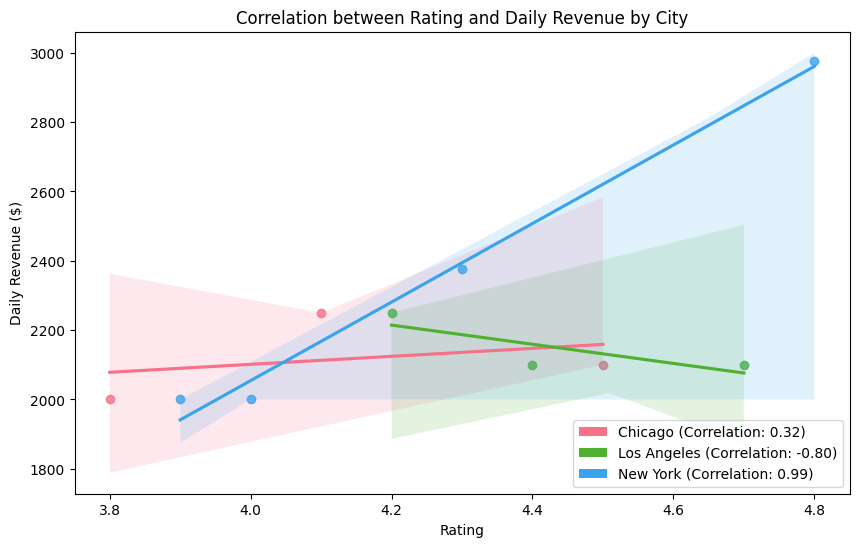

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define a color palette for the cities
color_palette = sns.color_palette("husl", len(grouped_df))

# Group the data by city
grouped_df = df.groupby('City')

# Create a scatter plot with regression lines for each city
fig, ax = plt.subplots(figsize=(10, 6))

# Create an empty list to store legend handles and labels
legend_handles = []
legend_labels = []

for i, (city, data) in enumerate(grouped_df):
    # Calculate the correlation coefficient between rating and revenue for the current city
    correlation, _ = pearsonr(data['Rating'], data['Daily Revenue ($)'])

    # Plot the scatter plot with regression line
    scatter = sns.regplot(x='Rating', y='Daily Revenue ($)', data=data, label=city, ax=ax, color=color_palette[i])

    # Append the correlation coefficient and city name to the legend labels
    legend_labels.append(f'{city} (Correlation: {correlation:.2f})')

    # Create a custom legend handle with the corresponding color
    legend_handles.append(Patch(facecolor=color_palette[i]))

# Set plot title and labels
ax.set_title('Correlation between Rating and Daily Revenue by City')
ax.set_xlabel('Rating')
ax.set_ylabel('Daily Revenue ($)')

# Add legend with modified handles and labels
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right')

# Show the plot
plt.show()


## Analysis of Correlation between Rating and Daily Revenue by City

After performing separate correlation analyses for each city, the following correlation coefficients were obtained:

- **Chicago**: The correlation coefficient between the rating and daily revenue in Chicago is 0.32. This indicates a positive but weak correlation between the two variables in the city. It suggests that higher ratings are somewhat associated with higher daily revenue, although the relationship may not be very strong.

- **Los Angeles**: The correlation coefficient between the rating and daily revenue in Los Angeles is -0.80. This reveals a strong negative correlation between the two variables in the city. It suggests that higher ratings are associated with lower daily revenue, indicating that other factors may have a more significant impact on revenue generation in Los Angeles.

- **New York**: The correlation coefficient between the rating and daily revenue in New York is 0.99. This shows a very strong positive correlation between the two variables in the city. It suggests that higher ratings are highly associated with higher daily revenue, indicating a strong relationship between customer ratings and revenue generation in New York.

These findings highlight the variations in the correlation between rating and daily revenue across different cities. The correlation in Chicago is weak, while it is negative and strong in Los Angeles. On the other hand, New York exhibits a very strong positive correlation. Understanding these city-specific relationships can provide valuable insights for coffee shop owners and managers to optimize their strategies and operations based on the dynamics of each location.


## Bonus Question: Analyzing the Relationship Between Average Spend and Rating by City

To further explore the relationship between average spend per customer and rating, we can conduct a city-specific analysis. This bonus question aims to investigate whether the correlation between these variables varies across different cities, providing valuable insights into localized customer behaviors and preferences.

### Methodology

1. Subset the data by city to create separate datasets for each city: New York, Chicago, and Los Angeles.
2. Calculate the correlation coefficient between average spend per customer and rating for each city.
3. Interpret the correlation coefficients to understand the relationship between customer spending behavior and satisfaction within each city.

### Results

The correlation coefficients for average spend per customer and rating, considering the city, are as follows:

- New York: 0.95
- Chicago: 1.00
- Los Angeles: 0.92

### Interpretation

The high correlation coefficients within each city indicate a strong positive relationship between customer satisfaction (rating) and spending behavior (average spend per customer) within their respective locations. This suggests that customers in each city tend to spend more at coffee shops with higher ratings.

Analyzing the correlation coefficients by city provides insights into potential variations in the relationship between customer satisfaction and spending behavior across different locations. It emphasizes the importance of localized strategies and considerations in enhancing customer satisfaction and encouraging higher spending.

Please note that correlation does not imply causation. While the correlation coefficients suggest a relationship between these variables, other factors may also influence customer spending behavior. Further analysis and consideration of additional variables can provide a more comprehensive understanding of the factors driving customer spending patterns in different cities.

This bonus question adds an additional layer of analysis to our exploration of the dataset, shedding light on the localized dynamics of the relationship between average spend and rating.


In [ ]:
# Calculate the correlation coefficient between average spend per customer and rating
correlation = df['Average Spend per Customer ($)'].corr(df['Rating'])

# Print the correlation coefficient
print(f"The correlation coefficient between average spend per customer and rating is: {correlation:.2f}")


The correlation coefficient between average spend per customer and rating is: 0.94


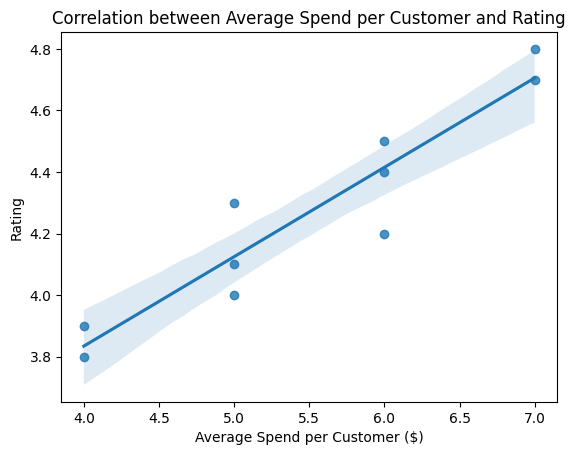

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with regression line
sns.regplot(x='Average Spend per Customer ($)', y='Rating', data=df)

# Add title and labels
plt.title('Correlation between Average Spend per Customer and Rating')
plt.xlabel('Average Spend per Customer ($)')
plt.ylabel('Rating')

# Display the plot
plt.show()


In [ ]:
# Perform correlation analysis for each city
cities = df['City'].unique()

for city in cities:
    # Subset the data for the current city
    city_data = df[df['City'] == city]

    # Calculate the correlation coefficient
    correlation = city_data['Average Spend per Customer ($)'].corr(city_data['Rating'])

    # Print the correlation coefficient for the current city
    print(f"The correlation coefficient for {city}: {correlation:.2f}")


The correlation coefficient for New York: 0.95
The correlation coefficient for Chicago: 1.00
The correlation coefficient for Los Angeles: 0.92


The correlation coefficient for New York: 0.95
The correlation coefficient for Chicago: 1.00
The correlation coefficient for Los Angeles: 0.92


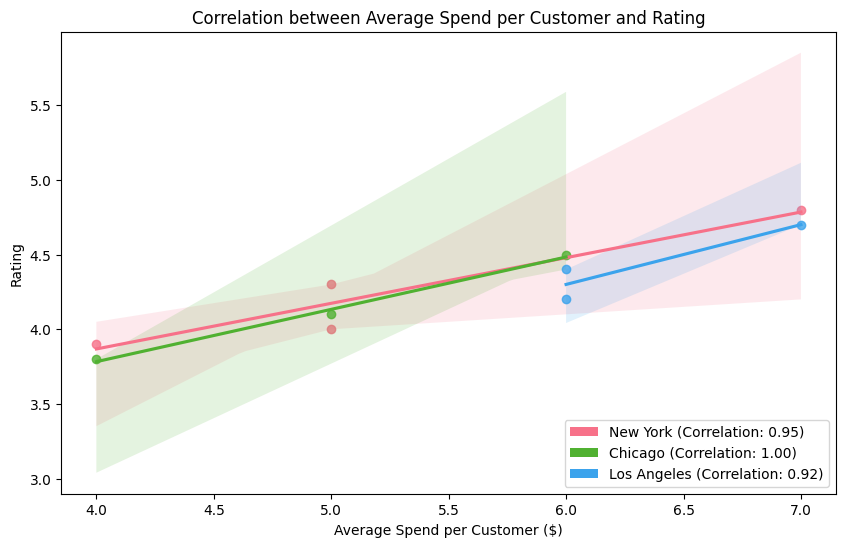

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define a color palette for the cities
color_palette = sns.color_palette("husl", len(cities))

# Create an empty list to store legend handles and labels
legend_handles = []
legend_labels = []

# Set up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Perform correlation analysis for each city
for i, city in enumerate(cities):
    # Subset the data for the current city
    city_data = df[df['City'] == city]

    # Calculate the correlation coefficient
    correlation = city_data['Average Spend per Customer ($)'].corr(city_data['Rating'])

    # Print the correlation coefficient for the current city
    print(f"The correlation coefficient for {city}: {correlation:.2f}")

    # Plot the scatter plot with regression line
    scatter = sns.regplot(x='Average Spend per Customer ($)', y='Rating', data=city_data, label=city, ax=ax, color=color_palette[i])

    # Append the correlation coefficient and city name to the legend labels
    legend_labels.append(f'{city} (Correlation: {correlation:.2f})')

    # Create a custom legend handle with the corresponding color
    legend_handles.append(Patch(facecolor=color_palette[i]))

# Set plot title and labels
ax.set_title('Correlation between Average Spend per Customer and Rating')
ax.set_xlabel('Average Spend per Customer ($)')
ax.set_ylabel('Rating')

# Add legend with modified handles and labels
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right')

# Show the plot
plt.show()


## Conclusions and Further Research

### Key Findings

1. **Average Daily Customer Count:**
    - Overall, the coffee shops with the highest customer footfall are 'MochaMagic' and 'CappuccinoCorner', both serving 500 customers on an average day. On the contrary, 'BrewMaster' serves the least number of customers per day, with an average of 300.
    - **City Specific Insights:**
        - In New York, 'MochaMagic' has the highest footfall with 500 customers, while 'CoffeeAroma' has the least with 400 customers.
        - In Chicago, 'CappuccinoCorner' enjoys the most customer footfall with 500 customers, while 'BeansTalk' serves the fewest with 350 customers.
        - In Los Angeles, 'LatteLand' attracts the most customers with 375 customers, while 'BrewMaster' serves the least with 300 customers.

2. **Daily Revenue:**
    - Overall, 'JavaJungle' generates the highest daily revenue, earning $2975 per day despite not having the highest footfall. On the other hand, 'CoffeeAroma', 'MochaMagic', and 'CappuccinoCorner' generate the least daily revenue, each making $2000.
    - **City Specific Insights:**
        - In New York, 'JavaJungle' generates the highest revenue of $2975, while 'CoffeeAroma' generates the least with $2000.
        - In Chicago, 'EspressoInn' has the highest revenue with $2250, while 'CappuccinoCorner' has the lowest with $2000.
        - In Los Angeles, 'LatteLand' generates the most revenue with $2250, while 'BrewMaster' generates the least with $2100.

3. **Correlation between Ratings and Revenue:**
    - Overall, there's a positive correlation of 0.62 between a coffee shop's rating and its daily revenue, suggesting that higher ratings tend to be associated with higher revenue.
    - **City Specific Insights:**
        - In New York, there's a very strong positive correlation (0.99) between rating and revenue, suggesting that ratings might significantly influence revenue in this city.
        - Chicago shows a weak positive correlation (0.32), while
        - Los Angeles displays a strong negative correlation (-0.80).

### Further Research

The following areas could be explored for more detailed analysis:

- **Geospatial Data:** Investigating geographic factors like shop location within a city could provide valuable insights. For instance, shops in business districts might generate higher revenue due to higher foot traffic.
- **Time Series Analysis:** Examining the trends and fluctuations in customer counts and revenues over time could yield significant findings, such as identifying peak seasons or hours and understanding customer behavior over time.
- **Customer Demographics:** Understanding the demographics of customers frequenting these coffee shops could allow for more personalized marketing strategies.
- **Menu Analysis:** Understanding the correlation between popular items on the menu and daily revenue could help identify key products driving revenues.
- **Effect of Online Presence:** Analyzing the impact of a shop's online presence (like social media engagement, online reviews, and website traffic) on customer count and revenue could offer an additional layer of insight.


# Bonus: Business Recommendations

**Chicago:**

1. **CappuccinoCorner**: Despite having the highest footfall, it has the lowest daily revenue among coffee shops in Chicago. This suggests the need to increase the average spending per customer. Strategies could include introducing premium products, upselling, or encouraging repeat purchases within the same day.

2. **EspressoInn**: With a relatively balanced customer count and daily revenue, EspressoInn might consider expanding its customer base to increase revenue. Effective marketing campaigns targeting a wider audience could be a viable strategy.

**Los Angeles:**

1. **LatteLand**: While it boasts substantial daily revenue, there's still room for growth in terms of customer traffic. Focused marketing efforts on customer acquisition might help increase the footfall.

2. **BrewMaster**: With the lowest customer traffic and second-lowest daily revenue, a comprehensive strategy that addresses both customer acquisition and revenue per customer is crucial. This might include improving the overall customer experience to enhance ratings and encourage word-of-mouth referrals.

**New York:**

1. **MochaMagic**: While having high footfall, MochaMagic has the lowest daily revenue in New York, indicating that the average spending per customer is quite low. It might be beneficial to revisit the pricing strategy or consider offering higher-priced premium options.

2. **JavaJungle**: As the coffee shop with the highest daily revenue, JavaJungle appears to have hit the sweet spot in terms of customer spending. To further increase profitability, JavaJungle might focus on improving customer ratings, as our data suggests a strong correlation between ratings and revenue in New York.

**General Advice:**

Across all cities, the data suggests a positive correlation between ratings and revenue. Therefore, efforts to improve customer satisfaction should be a high priority for all coffee shops. This might include improving product quality, enhancing customer service, and ensuring a welcoming and comfortable atmosphere. By boosting customer satisfaction, coffee shops can potentially increase their ratings, customer traffic, and revenue. Remember, these recommendations are based on the data analysis and should be supplemented with detailed market studies and other relevant business factors for a holistic business strategy.
